In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.options.display.float_format = '{:,.2f}'.format


#### Data Source:  https://data.world/nrippner/ols-regression-challenge

### Data Dictionary
<b>TARGET_deathRate:</b> Dependent variable. Mean per capita (100,000) cancer mortalities(a)

<b>avgAnnCount:</b> Mean number of reported cases of cancer diagnosed annually(a)

<b>avgDeathsPerYear:</b> Mean number of reported mortalities due to cancer(a)

<b>incidenceRate:</b> Mean per capita (100,000) cancer diagoses(a)

<b>medianIncome:</b> Median income per county (b)

<b>popEst2015:</b> Population of county (b)

<b>povertyPercent:</b> Percent of populace in poverty (b)

<b>studyPerCap:</b> Per capita number of cancer-related clinical trials per county (a)

<b>binnedInc:</b> Median income per capita binned by decile (b)

<b>MedianAge:</b> Median age of county residents (b)

<b>MedianAgeMale:</b> Median age of male county residents (b)

<b>MedianAgeFemale:</b> Median age of female county residents (b)

<b>Geography:</b> County name (b)

<b>AvgHouseholdSize:</b> Mean household size of county (b)

<b>PercentMarried:</b> Percent of county residents who are married (b)

<b>PctNoHS18_24:</b> Percent of county residents ages 18-24 highest education attained: less than high school (b)

<b>PctHS18_24:</b> Percent of county residents ages 18-24 highest education attained: high school diploma (b)

<b>PctSomeCol18_24:</b> Percent of county residents ages 18-24 highest education attained: some college (b)

<b>PctBachDeg18_24:</b> Percent of county residents ages 18-24 highest education attained: bachelor's degree (b)

<b>PctHS25_Over:</b> Percent of county residents ages 25 and over highest education attained: high school diploma (b)

<b>PctBachDeg25_Over:</b> Percent of county residents ages 25 and over highest education attained: bachelor's degree (b)

<b>PctEmployed16_Over:</b> Percent of county residents ages 16 and over employed (b)

<b>PctUnemployed16_Over:</b> Percent of county residents ages 16 and over unemployed (b)

<b>PctPrivateCoverage:</b> Percent of county residents with private health coverage (b)

<b>PctPrivateCoverageAlone:</b> Percent of county residents with private health coverage alone (no public assistance) (b)

<b>PctEmpPrivCoverage:</b> Percent of county residents with employee-provided private health coverage (b)

<b>PctPublicCoverage:</b> Percent of county residents with government-provided health coverage (b)

<b>PctPubliceCoverageAlone:</b> Percent of county residents with government-provided health coverage alone (b)

<b>PctWhite:</b> Percent of county residents who identify as White (b)

<b>PctBlack:</b> Percent of county residents who identify as Black (b)

<b>PctAsian:</b> Percent of county residents who identify as Asian (b)

<b>PctOtherRace:</b> Percent of county residents who identify in a category which is not White, Black, or Asian (b)

<b>PctMarriedHouseholds:</b> Percent of married households (b)

<b>BirthRate:</b> Number of live births relative to number of women in county (b)

(a): years 2010-2016

(b): 2013 Census Estimates




In [38]:
data_f_path = '.\Data\\'
df_cancer = pd.read_csv(data_f_path + 'cancer_reg.csv')

In [39]:
df_cancer.shape

(3047, 34)

In [4]:
df_cancer[(df_cancer['target_deathrate'] < 60) | (df_cancer['target_deathrate'] > 360)]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
1093,64.00,12,59.70,318.50,73274,17787,7.00,0.00,"(61494.5, 125635]",43.40,43.70,43.40,"Pitkin County, Colorado",2.28,38.00,24.10,20.00,nan,15.30,11.50,42.20,69.00,7.70,75.10,64.40,41.60,19.10,9.60,94.44,1.53,1.44,1.14,35.71,5.17
1489,214.00,61,362.80,"1,206.90",40207,15234,24.30,0.00,"(37413.8, 40362.7]",40.30,42.30,36.90,"Union County, Florida",2.58,36.40,27.00,45.10,nan,0.00,37.40,5.50,nan,11.70,59.60,49.20,41.00,35.80,22.50,73.96,21.59,0.65,1.53,50.01,3.74


In [5]:
df_cancer.loc[0,'binnedinc']

'(61494.5, 125635]'

In [6]:
df_cancer.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,"1,397.00",469,164.90,489.80,61898,260131,11.20,499.75,"(61494.5, 125635]",39.30,36.90,41.70,"Kitsap County, Washington",2.54,52.50,11.50,39.50,42.10,6.90,23.20,19.60,51.90,8.00,75.10,nan,41.60,32.90,14.00,81.78,2.59,4.82,1.84,52.86,6.12
1,173.00,70,161.30,411.60,48127,43269,18.60,23.11,"(48021.6, 51046.4]",33.00,32.20,33.70,"Kittitas County, Washington",2.34,44.50,6.10,22.40,64.00,7.50,26.00,22.70,55.90,7.80,70.20,53.80,43.60,31.10,15.30,89.23,0.97,2.25,3.74,45.37,4.33
2,102.00,50,174.70,349.70,49348,21026,14.60,47.56,"(48021.6, 51046.4]",45.00,44.00,45.80,"Klickitat County, Washington",2.62,54.20,24.00,36.60,nan,9.50,29.00,16.00,45.90,7.00,63.70,43.50,34.90,42.10,21.10,90.92,0.74,0.47,2.75,54.44,3.73
3,427.00,202,194.80,430.40,44243,75882,17.10,342.64,"(42724.4, 45201]",42.80,42.20,43.40,"Lewis County, Washington",2.52,52.70,20.20,41.20,36.10,2.50,31.60,9.30,48.30,12.10,58.40,40.30,35.00,45.30,25.00,91.74,0.78,1.16,1.36,51.02,4.60
4,57.00,26,144.40,350.10,49955,10321,12.50,0.00,"(48021.6, 51046.4]",48.30,47.80,48.90,"Lincoln County, Washington",2.34,57.80,14.90,43.00,40.00,2.00,33.40,15.00,48.20,4.80,61.60,43.90,35.10,44.00,22.70,94.10,0.27,0.67,0.49,54.03,6.80


In [7]:
(df_cancer['pctwhite'] + df_cancer['pctblack'] + df_cancer['pctasian'] + df_cancer['pctotherrace']).head()

0   91.04
1   96.19
2   94.88
3   95.05
4   95.53
dtype: float64

In [8]:
df_cancer.shape

(3047, 34)

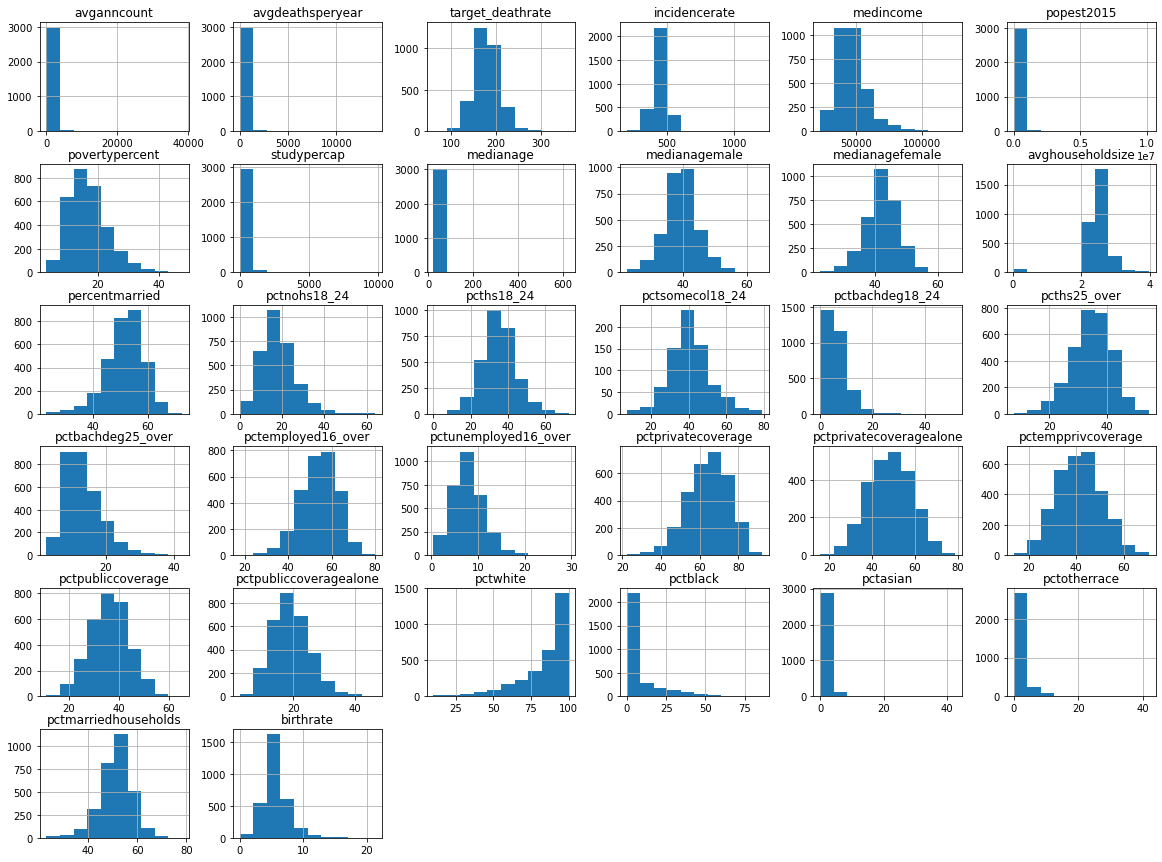

In [9]:
df_cancer.hist(figsize=(20,15))
plt.show()

In [10]:
df_cancer.corr()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
avganncount,1.00,0.94,-0.14,0.07,0.27,0.93,-0.14,0.08,-0.02,-0.12,-0.12,0.06,-0.11,-0.14,-0.18,0.11,0.28,-0.31,0.32,0.20,-0.01,0.13,0.19,0.20,-0.17,-0.09,-0.14,0.03,0.44,0.21,-0.11,-0.03
avgdeathsperyear,0.94,1.00,-0.09,0.06,0.22,0.98,-0.07,0.06,-0.02,-0.15,-0.14,0.09,-0.18,-0.14,-0.15,0.10,0.26,-0.30,0.29,0.13,0.07,0.06,0.13,0.16,-0.13,-0.03,-0.19,0.08,0.44,0.22,-0.16,-0.07
target_deathrate,-0.14,-0.09,1.00,0.45,-0.43,-0.12,0.43,-0.02,0.00,-0.02,0.01,-0.04,-0.27,0.09,0.26,-0.19,-0.29,0.40,-0.49,-0.41,0.38,-0.39,-0.36,-0.27,0.40,0.45,-0.18,0.26,-0.19,-0.19,-0.29,-0.09
incidencerate,0.07,0.06,0.45,1.00,-0.00,0.03,0.01,0.08,0.02,-0.01,-0.01,-0.12,-0.12,-0.17,0.02,0.08,0.05,0.12,-0.04,0.00,0.10,0.11,0.11,0.15,0.05,0.04,-0.01,0.11,-0.01,-0.21,-0.15,-0.12
medincome,0.27,0.22,-0.43,-0.00,1.00,0.24,-0.79,0.04,-0.01,-0.09,-0.15,0.11,0.36,-0.29,-0.19,0.21,0.49,-0.47,0.70,0.69,-0.45,0.72,0.79,0.75,-0.75,-0.72,0.17,-0.27,0.43,0.08,0.45,-0.01
popest2015,0.93,0.98,-0.12,0.03,0.24,1.00,-0.07,0.06,-0.03,-0.18,-0.18,0.11,-0.16,-0.13,-0.15,0.09,0.25,-0.31,0.30,0.14,0.05,0.05,0.13,0.16,-0.16,-0.04,-0.19,0.07,0.46,0.24,-0.13,-0.06
povertypercent,-0.14,-0.07,0.43,0.01,-0.79,-0.07,1.00,-0.06,-0.03,-0.21,-0.15,0.07,-0.64,0.29,0.09,-0.16,-0.39,0.19,-0.53,-0.74,0.66,-0.82,-0.76,-0.68,0.65,0.80,-0.51,0.51,-0.16,0.05,-0.60,-0.01
studypercap,0.08,0.06,-0.02,0.08,0.04,0.06,-0.06,1.00,-0.03,-0.04,-0.03,-0.00,-0.04,-0.09,-0.06,0.10,0.06,-0.09,0.11,0.09,-0.03,0.09,0.07,0.10,-0.05,-0.06,0.02,-0.02,0.06,-0.02,-0.05,0.01
medianage,-0.02,-0.02,0.00,0.02,-0.01,-0.03,-0.03,-0.03,1.00,0.13,0.12,-0.03,0.05,0.01,0.05,-0.02,-0.02,0.04,-0.02,-0.02,0.02,0.00,-0.02,-0.04,0.05,-0.00,0.04,-0.02,-0.04,-0.03,0.01,-0.01
medianagemale,-0.12,-0.15,-0.02,-0.01,-0.09,-0.18,-0.21,-0.04,0.13,1.00,0.93,-0.34,0.45,0.10,0.24,-0.27,-0.03,0.32,-0.13,-0.17,-0.14,0.08,-0.17,-0.21,0.40,0.00,0.40,-0.24,-0.24,-0.27,0.22,-0.10


In [11]:
df_cancer[df_cancer['avghouseholdsize'] < .2]

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
23,499.00,215,206.10,463.10,56737,111901,13.20,89.36,"(54545.6, 61494.5]",38.40,38.00,38.60,"Berkeley County, West Virginia",0.03,51.80,17.00,40.80,32.20,10.00,38.20,12.70,58.70,9.70,70.00,nan,49.70,33.10,17.30,87.80,7.33,1.05,0.91,51.52,4.87
33,58.00,22,128.00,356.30,41039,11766,17.00,0.00,"(40362.7, 42724.4]",45.60,45.50,45.70,"Grant County, West Virginia",0.03,50.50,16.30,41.50,33.80,8.40,50.20,7.00,51.30,6.70,65.10,48.00,44.50,42.40,21.20,97.38,1.38,0.00,0.11,55.40,3.53
121,"1,962.67",20,254.30,453.55,40714,4478,19.00,0.00,"(40362.7, 42724.4]",48.70,48.00,49.20,"Mineral County, Nevada",0.02,41.80,6.10,42.30,51.60,0.00,31.20,6.80,48.10,15.40,58.10,39.60,36.40,43.20,21.60,66.69,1.31,4.10,4.36,34.42,9.52
122,"1,962.67",154,213.50,453.55,42881,42477,16.80,0.00,"(42724.4, 45201]",50.80,50.80,50.80,"Nye County, Nevada",0.02,54.40,32.30,41.20,nan,3.30,35.60,9.20,39.70,13.40,53.10,34.60,30.20,48.20,25.00,85.66,2.56,1.43,5.16,52.18,6.30
196,465.00,163,158.60,470.80,52792,78288,12.70,102.19,"(51046.4, 54545.6]",42.50,41.20,44.00,"Cayuga County, New York",0.02,46.80,19.40,27.70,45.60,7.30,34.10,12.50,56.90,7.30,71.00,53.20,48.70,36.20,17.90,92.28,4.36,0.43,0.59,45.82,5.47
199,337.00,121,180.30,512.40,46387,48844,16.70,0.00,"(45201, 48021.6]",43.80,42.60,45.00,"Chenango County, New York",0.02,50.20,16.60,36.40,41.20,5.80,39.20,9.50,53.60,7.10,66.00,48.80,44.90,40.70,20.80,96.24,0.85,0.53,0.48,49.42,5.05
221,106.00,44,201.50,508.00,37996,15673,24.30,0.00,"(37413.8, 40362.7]",41.50,41.00,43.90,"Nottoway County, Virginia",0.03,42.70,26.70,40.20,nan,0.00,37.10,10.50,43.80,10.80,59.20,41.60,35.60,44.10,24.50,56.82,39.56,0.57,1.08,44.25,7.33
255,250.00,60,178.20,718.90,45890,46597,25.90,364.83,"(45201, 48021.6]",29.80,29.30,30.30,"Charlottesville city, Virginia",0.02,30.10,4.90,22.20,nan,18.00,22.20,23.30,60.60,4.30,76.10,67.10,52.90,20.30,11.90,70.73,19.24,6.66,0.31,30.49,2.75
387,154.00,59,173.60,470.10,47542,26957,14.30,593.54,"(45201, 48021.6]",41.40,40.40,42.30,"Lewis County, New York",0.03,56.00,18.50,35.10,nan,9.00,45.30,8.70,55.60,8.30,68.30,52.20,45.90,36.10,19.40,96.80,0.92,0.45,0.65,56.38,5.44
395,"1,470.00",542,173.90,501.50,48350,232500,17.70,38.71,"(48021.6, 51046.4]",41.20,39.40,42.90,"Oneida County, New York",0.02,44.00,13.20,27.40,nan,10.60,33.40,13.90,54.90,7.40,66.40,49.60,45.80,42.20,23.70,85.99,6.02,3.62,1.56,43.50,5.55


In [12]:
df_cancer.loc[:,'target_deathrate']

0      164.90
1      161.30
2      174.70
3      194.80
4      144.40
        ...  
3042   149.60
3043   150.10
3044   153.90
3045   175.00
3046   213.60
Name: target_deathrate, Length: 3047, dtype: float64

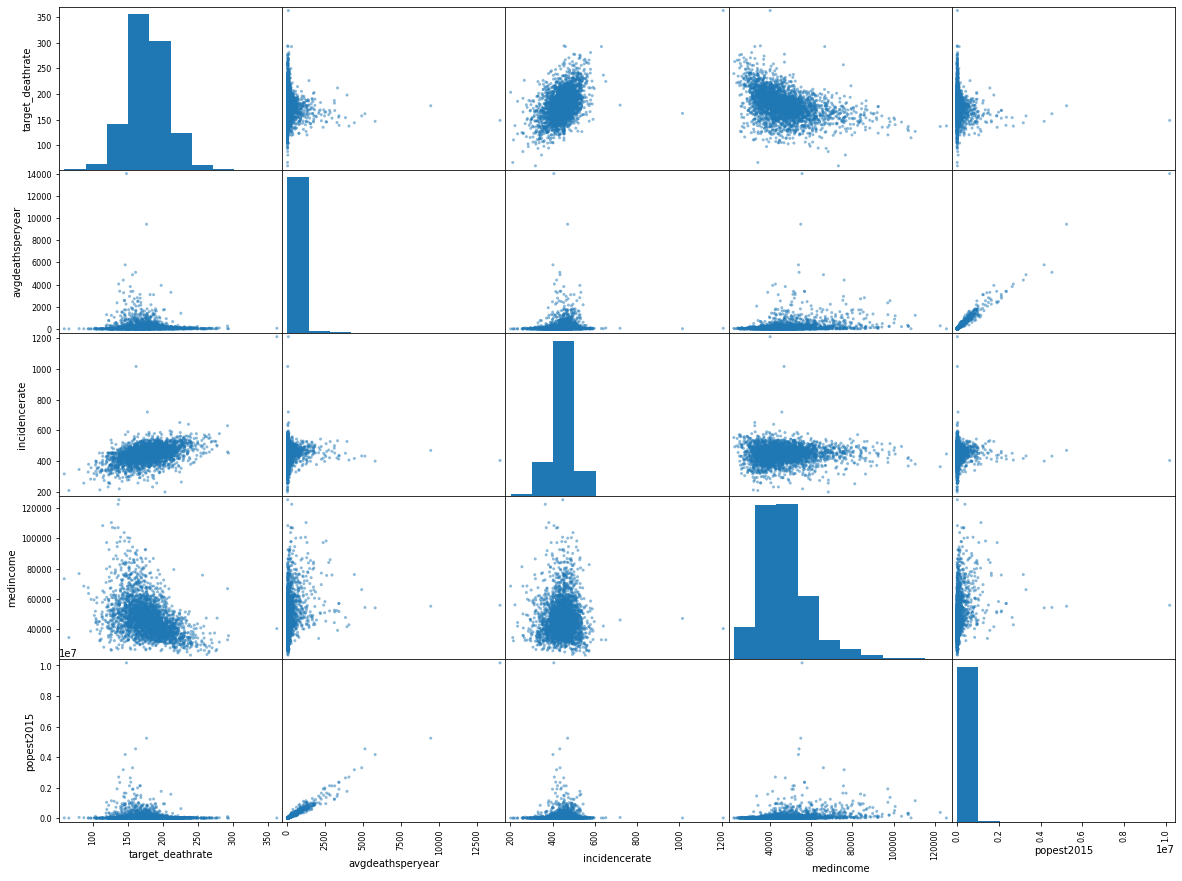

In [13]:
scatter_matrix(df_cancer.iloc[:,[2,1,3,4,5]],figsize=(20,15))
plt.show()

### Variable Issues
<ul><li>Median Age has bad data...in the up to 600 range</li>

C:\Users\barker.FRENCH\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:328: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


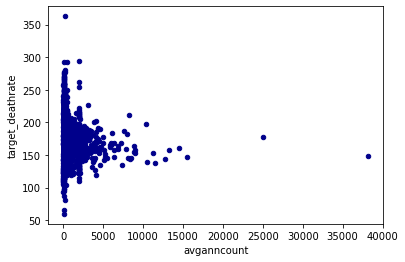

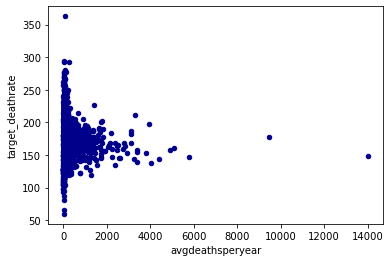

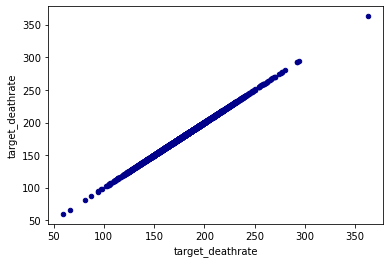

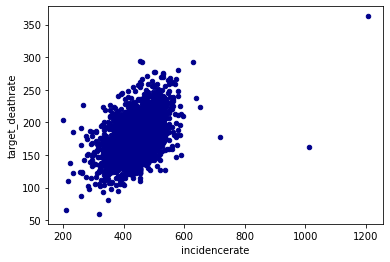

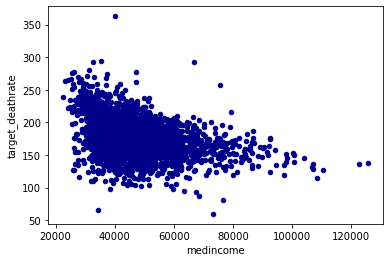

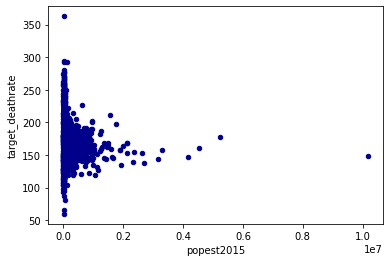

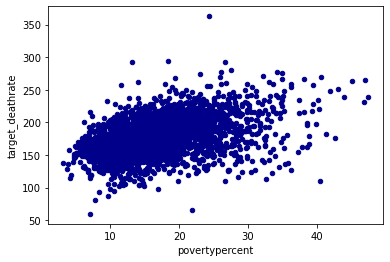

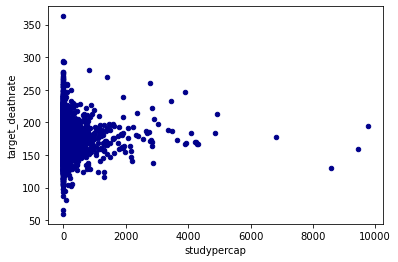

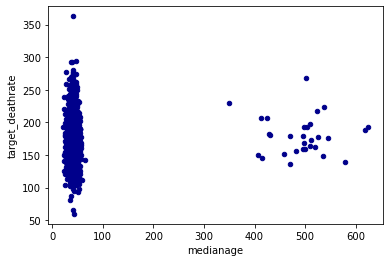

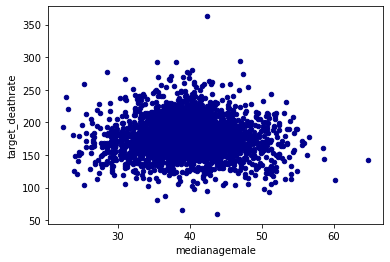

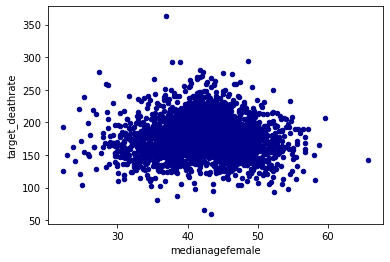

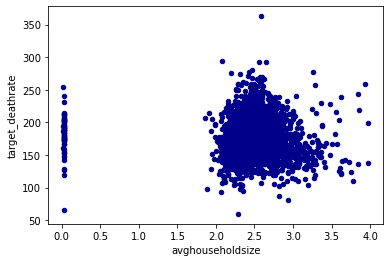

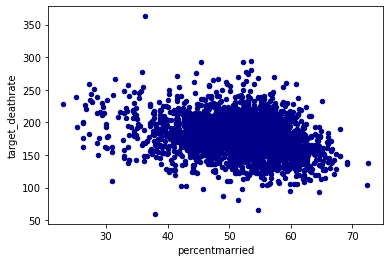

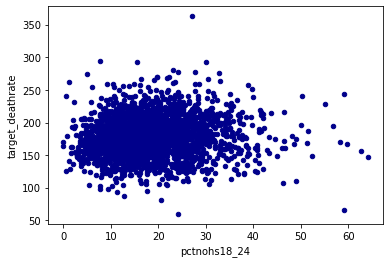

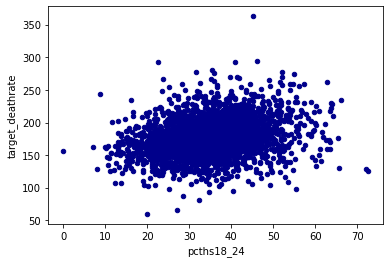

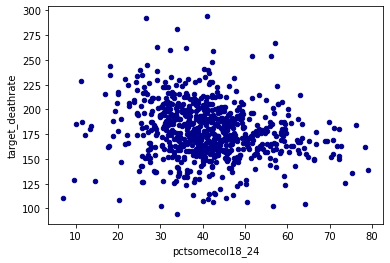

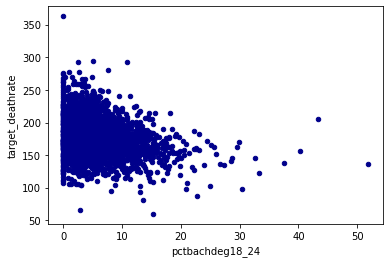

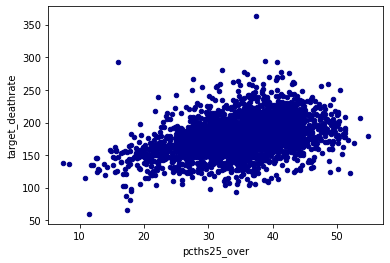

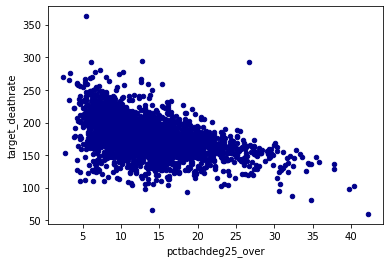

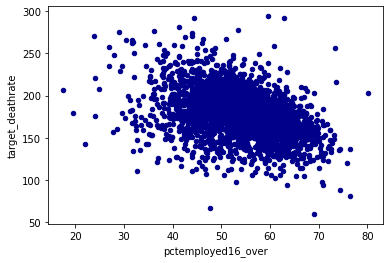

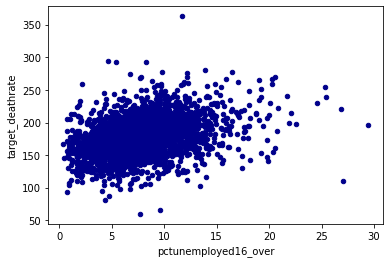

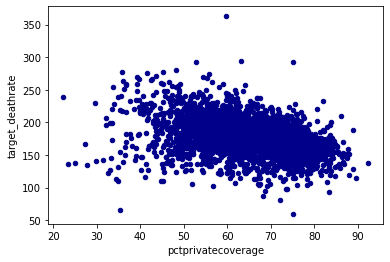

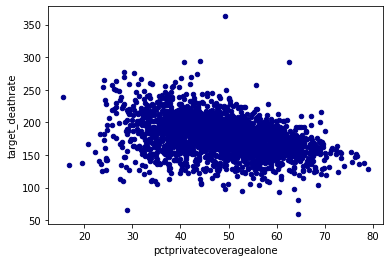

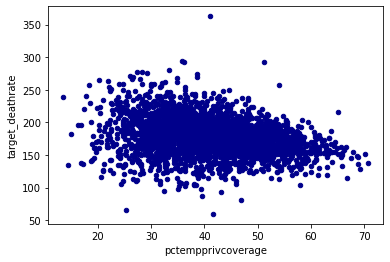

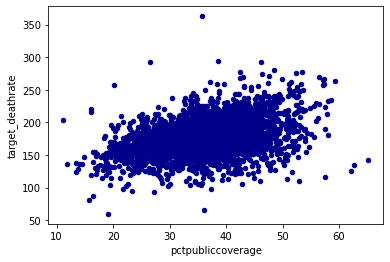

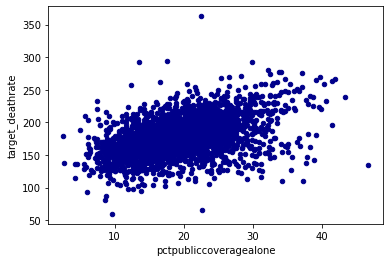

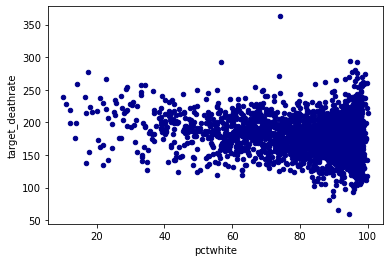

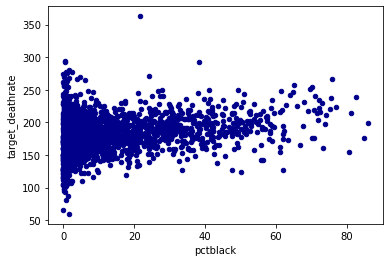

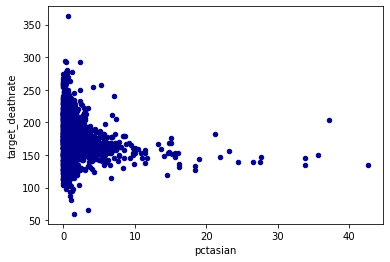

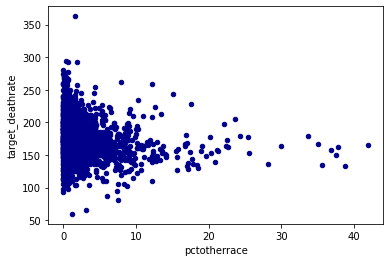

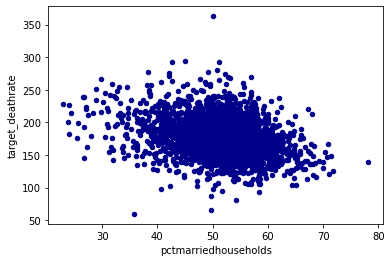

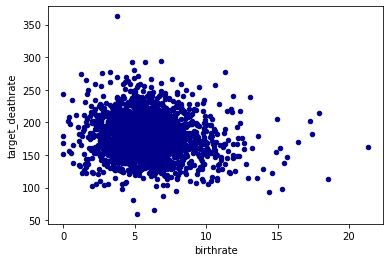

In [14]:
for col in df_cancer.dtypes[df_cancer.dtypes != 'object'].index:
    df_cancer.plot.scatter(x=col,y='target_deathrate',c='DarkBlue')

In [15]:
# drop unrealistic values
print('medianage unrealistic > 100:', len(df_cancer[df_cancer['medianage'] > 100]),'instances')

medianage unrealistic > 100: 30 instances


In [16]:
df_cancer[(df_cancer['avganncount'] > 10000)].sort_values(by='avganncount')

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,medianagefemale,geography,avghouseholdsize,percentmarried,pctnohs18_24,pcths18_24,pctsomecol18_24,pctbachdeg18_24,pcths25_over,pctbachdeg25_over,pctemployed16_over,pctunemployed16_over,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
365,"10,411.00",3927,197.90,528.70,41434,1759335,24.10,470.06,"(40362.7, 42724.4]",37.80,36.10,39.20,"Wayne County, Michigan",2.63,38.10,18.80,30.70,nan,7.10,30.30,13.40,49.90,14.90,58.40,44.60,41.00,42.00,26.00,53.34,39.41,2.90,1.73,37.16,5.68
2086,"10,502.00",3405,138.80,435.20,56866,2339150,15.40,16.67,"(54545.6, 61494.5]",37.70,36.20,39.20,"Queens County, New York",2.91,45.30,13.60,23.50,nan,15.10,27.30,19.30,58.70,8.60,54.50,45.50,40.90,37.40,26.50,41.15,18.48,24.38,12.15,44.72,4.84
386,"11,217.00",3824,153.80,452.30,47547,2636735,23.40,42.48,"(45201, 48021.6]",34.40,32.80,35.80,"Kings County, New York",2.74,40.10,15.50,26.00,nan,16.50,26.20,20.10,56.90,10.00,51.40,43.30,38.70,43.40,31.80,43.39,33.54,11.48,8.87,37.53,5.23
1467,"11,495.00",4052,137.30,408.00,42754,2693117,20.40,164.86,"(42724.4, 45201]",39.00,37.50,40.50,"Miami-Dade County, Florida",3.08,40.70,15.40,29.10,46.90,8.60,28.50,17.10,56.00,10.00,46.40,41.20,32.50,32.00,21.80,75.75,18.64,1.59,2.43,43.27,4.37
1012,"12,694.00",4410,143.80,418.60,76061,3169776,12.90,145.75,"(61494.5, 125635]",37.10,35.80,38.40,"Orange County, California",3.04,50.10,11.50,27.00,nan,11.20,17.70,24.40,60.90,7.60,65.00,56.30,47.40,27.90,18.30,63.22,1.66,18.95,11.82,54.61,4.83
1020,"13,294.00",4895,157.10,434.90,66034,3299521,14.70,139.11,"(61494.5, 125635]",35.10,33.70,36.50,"San Diego County, California",2.86,47.20,10.90,32.20,nan,9.60,19.00,22.10,56.70,8.70,66.60,55.50,44.60,28.40,16.80,70.85,5.07,11.45,6.71,49.62,4.95
1860,"14,477.00",5108,161.40,433.80,54230,4538028,17.30,391.36,"(51046.4, 54545.6]",32.80,32.00,33.60,"Harris County, Texas",2.88,47.20,19.90,30.50,40.90,8.80,23.30,18.90,63.20,7.50,54.70,47.60,42.80,27.50,19.80,63.12,18.86,6.57,8.73,46.91,6.03
2741,"15,470.00",5780,146.60,401.40,53929,4167947,17.10,177.55,"(51046.4, 54545.6]",35.60,34.50,36.80,"Maricopa County, Arizona",2.75,47.10,16.70,30.50,nan,8.30,23.00,19.50,58.40,7.70,63.10,51.40,44.10,31.40,19.80,79.58,5.22,3.79,6.19,47.04,5.39
2373,"24,965.00",9445,177.00,470.80,55058,5238216,17.10,371.12,"(54545.6, 61494.5]",35.90,34.70,37.10,"Cook County, Illinois",2.65,41.90,14.90,26.70,nan,15.50,24.00,21.50,59.00,10.70,61.50,nan,46.30,32.60,22.00,56.84,23.98,6.77,9.85,41.01,4.99
999,"38,150.00",14010,148.40,405.50,55686,10170292,18.70,255.94,"(54545.6, 61494.5]",35.60,34.40,36.80,"Los Angeles County, California",3.02,42.40,15.30,27.00,47.90,9.90,20.70,19.80,58.00,10.00,55.00,47.40,39.70,32.90,23.00,53.26,8.28,14.13,19.59,44.58,4.71


In [17]:
df_cancer.describe().T

,count,mean,std,min,25%,50%,75%,max
avganncount,"3,047.00",606.34,"1,416.36",6.00,76.00,171.00,518.00,"38,150.00"
avgdeathsperyear,"3,047.00",185.97,504.13,3.00,28.00,61.00,149.00,"14,010.00"
target_deathrate,"3,047.00",178.66,27.75,59.70,161.20,178.10,195.20,362.80
incidencerate,"3,047.00",448.27,54.56,201.30,420.30,453.55,480.85,"1,206.90"
medincome,"3,047.00","47,063.28","12,040.09","22,640.00","38,882.50","45,207.00","52,492.00","125,635.00"
popest2015,"3,047.00","102,637.37","329,059.22",827.00,"11,684.00","26,643.00","68,671.00","10,170,292.00"
povertypercent,"3,047.00",16.88,6.41,3.20,12.15,15.90,20.40,47.40
studypercap,"3,047.00",155.40,529.63,0.00,0.00,0.00,83.65,"9,762.31"
medianage,"3,047.00",45.27,45.30,22.30,37.70,41.00,44.00,624.00
medianagemale,"3,047.00",39.57,5.23,22.40,36.35,39.60,42.50,64.70


In [18]:
df_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3047 entries, 0 to 3046
Data columns (total 34 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  geography                3047 non-null   object 
 13  avghouseholdsize         3047 non-null   float64
 14  percentmarried          

In [19]:
df_cancer.describe(include=object)

,binnedinc,geography
count,3047,3047
unique,10,3047
top,"(45201, 48021.6]","Daniels County, Montana"
freq,306,1


In [20]:
df_cancer.binnedinc.value_counts()

(45201, 48021.6]      306
(54545.6, 61494.5]    306
[22640, 34218.1]      306
(48021.6, 51046.4]    305
(51046.4, 54545.6]    305
(42724.4, 45201]      305
(37413.8, 40362.7]    304
(40362.7, 42724.4]    304
(34218.1, 37413.8]    304
(61494.5, 125635]     302
Name: binnedinc, dtype: int64

In [21]:
# From Ben Payne's loans_5_unique_names_per_column
first_n_entries = 5
for col,col_type in df_cancer.dtypes.iteritems():
    if(col_type=='object'):
        print('\n',col,'has',df_cancer[col].nunique(),'unique entries; first ',first_n_entries,'are')
        print(df_cancer[col][0:first_n_entries])


 binnedinc has 10 unique entries; first  5 are
0     (61494.5, 125635]
1    (48021.6, 51046.4]
2    (48021.6, 51046.4]
3      (42724.4, 45201]
4    (48021.6, 51046.4]
Name: binnedinc, dtype: object

 geography has 3047 unique entries; first  5 are
0       Kitsap County, Washington
1     Kittitas County, Washington
2    Klickitat County, Washington
3        Lewis County, Washington
4      Lincoln County, Washington
Name: geography, dtype: object


In [37]:
# Ben Paynes loans_empty_entries
df_cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [23]:
# From Ben Paynes loans_empty_entries_1
def uniq_per_col(df,count):
    for this_column in df.columns:
        print("==== ",this_column,"has",df[this_column].nunique(),"unique entries ====")
        print(df[this_column].value_counts().sort_values(ascending=False).head(count))

In [24]:
uniq_per_col(df_cancer,5)

====  avganncount has 929 unique entries ====
1,962.67    206
81.00        20
61.00        19
48.00        18
50.00        17
Name: avganncount, dtype: int64
====  avgdeathsperyear has 608 unique entries ====
13    40
24    39
14    37
16    37
15    35
Name: avgdeathsperyear, dtype: int64
====  target_deathrate has 1053 unique entries ====
184.30    11
182.80    10
176.40    10
179.90    10
173.60    10
Name: target_deathrate, dtype: int64
====  incidencerate has 1506 unique entries ====
453.55    206
430.40     10
444.50      8
475.70      7
469.00      6
Name: incidencerate, dtype: int64
====  medincome has 2920 unique entries ====
34116    3
51175    3
36627    3
42582    3
48368    3
Name: medincome, dtype: int64
====  popest2015 has 2999 unique entries ====
17403    3
2679     2
16203    2
10483    2
3402     2
Name: popest2015, dtype: int64
====  povertypercent has 333 unique entries ====
13.90    31
10.70    30
14.70    30
17.50    29
12.90    29
Name: povertypercent, dtype: in

In [25]:
# From Ben Paynes loans_empty_entries_1
for this_column in df_cancer.columns:
    if (df_cancer[this_column].nunique()==1):
        print(this_column)

<AxesSubplot:>

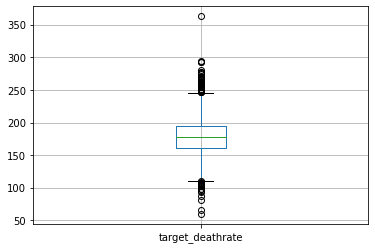

In [26]:
#Remove the outlier from target_deathrate
df_cancer.boxplot('target_deathrate')

In [27]:
df_cancer.dtypes[df_cancer.dtypes != 'object'].index

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'avghouseholdsize',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

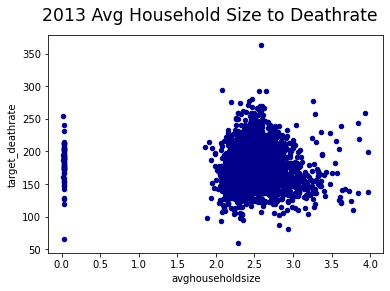

In [32]:
df_cancer.plot.scatter(x='avghouseholdsize',y='target_deathrate',c='DarkBlue')
plt.suptitle('2013 Avg Household Size to Deathrate', x=0.5, y=.98, ha='center', fontsize='xx-large')
plt.show()

In [34]:
len(df_cancer[df_cancer['avghouseholdsize'] < 1])

61